In [1]:
import pandas as pd

In [2]:
timeseries = pd.read_parquet('../data/interim/comb_trips.gzip').set_index('started_at')

timeseries.index.name='date'
weekly = timeseries.resample('1W').count().ended_at

In [3]:
timeseries.groupby("member_casual").count()


,ended_at,start_station_id,end_station_id
member_casual,,,
casual,7343280,7194100,7164214
member,23791818,23654127,23647349
unknown,58,58,58


In [15]:
membertrips_week = timeseries[timeseries.member_casual == 'member'].resample('1W').count().ended_at
casualtrips_week = timeseries[timeseries.member_casual == 'casual'].resample('1W').count().ended_at

In [16]:
membertrips_week.name = "member trips"
casualtrips_week.name = "non-member trips"


In [17]:
weekly


date
2010-09-26     2724
2010-10-03     3200
2010-10-10     5602
2010-10-17     7595
2010-10-24     9359
              ...  
2022-01-09    15083
2022-01-16    26774
2022-01-23    26949
2022-01-30    27674
2022-02-06     4268
Freq: W-SUN, Name: ended_at, Length: 594, dtype: int64

In [32]:
start = weekly.index.min()
end = weekly.index.max()
end

Timestamp('2022-02-06 00:00:00', freq='W-SUN')

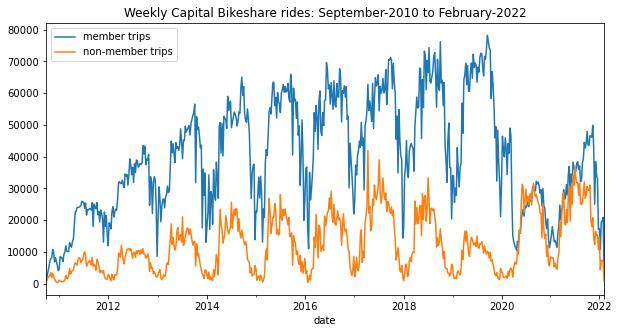

In [31]:

ax = combined_timseries = pd.merge_asof(
    membertrips_week, casualtrips_week, left_index=True, right_index=True
).plot(figsize=(10,5), title=f"Weekly Capital Bikeshare rides: {start.month_name()}-{start.year} to {end.month_name()}-{end.year}")
fig = ax.get_figure()
fig.savefig(
    "../reports/figures/weekly_trips.png", bbox_inches="tight", facecolor="w", dpi=200
)


In [19]:
casualtrips_week[casualtrips_week.argmax()]
casualtrips_week.index[casualtrips_week.argmax()]


Timestamp('2017-04-16 00:00:00', freq='W-SUN')

<AxesSubplot:xlabel='date'>

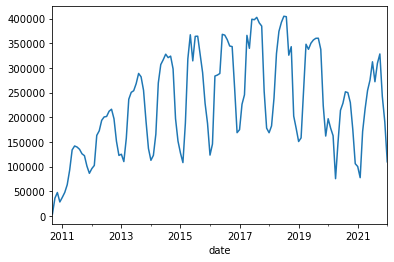

In [20]:
timeseries.resample("1M").count().ended_at.plot()
